In [1]:
import numpy as np
from matplotlib import pylab as plt
from scipy.fftpack import rfft, rfftfreq, irfft
plt.style.use("classic")

In [2]:
x = np.arange(0, np.pi * 2 + 0.1, 0.1)
y = np.cos(x) + np.cos(10 * x)


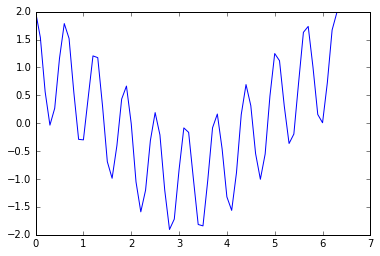

In [3]:

plt.plot(x, y)

In [4]:
with open("data.txt", 'w') as txt:
    for i in range(len(x)):
        print(x[i], y[i], sep='\t', file=txt)

In [5]:
y_fft = rfft(y)
n = y_fft.size
timestep=0.1
freq = rfftfreq(n, d=timestep)
print(y_fft, freq, sep='\n')
print(y_fft.shape, freq.shape)

[ 2.31404775e+00  3.33787983e+01  1.91529255e+00  7.77102134e-01
  8.79203132e-02  1.08371102e+00  1.85869201e-01  1.23483403e+00
  2.85028706e-01  1.38912969e+00  4.05380544e-01  1.60133749e+00
  5.68615915e-01  1.94467585e+00  8.19201180e-01  2.60787805e+00
  1.28063053e+00  4.40531743e+00  2.49081347e+00  2.56472300e+01
  1.65528479e+01 -5.32128544e+00 -3.89754412e+00 -2.15786777e+00
 -1.78744903e+00 -1.24901775e+00 -1.16845773e+00 -8.21098135e-01
 -8.68078338e-01 -5.74206124e-01 -6.87970831e-01 -4.14795867e-01
 -5.66204748e-01 -3.04260465e-01 -4.77171118e-01 -2.23778182e-01
 -4.08344988e-01 -1.63088515e-01 -3.52865384e-01 -1.16130251e-01
 -3.06650941e-01 -7.90998639e-02 -2.67115361e-01 -4.94962759e-02
 -2.32534830e-01 -2.56132001e-02 -2.01711286e-01 -6.25232017e-03
 -1.73781611e-01  9.44699372e-03 -1.48103799e-01  2.21129529e-02
 -1.24185982e-01  3.22085904e-02 -1.01640434e-01  4.00758158e-02
 -8.01526745e-02  4.59647825e-02 -5.94599672e-02  5.00535901e-02
 -3.93357839e-02  5.24613

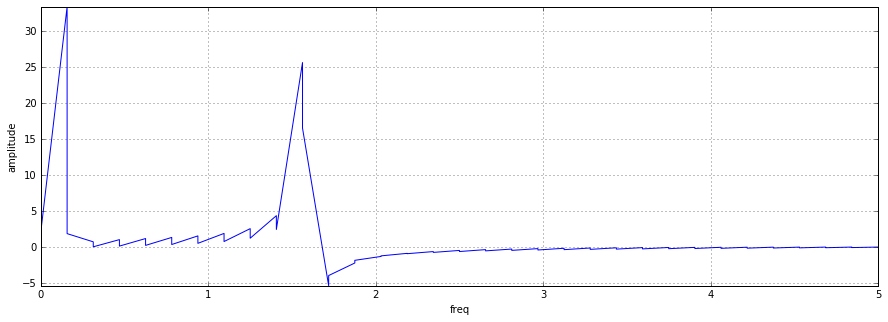

In [6]:
plt.figure(figsize=(15, 5))
plt.xlim(freq[0], freq[-1])
plt.ylim(np.min(y_fft), np.max(y_fft))
plt.xlabel("freq")
plt.ylabel("amplitude")
plt.grid(True)
plt.plot(freq, y_fft)

In [7]:
y_fft_mod = np.copy(y_fft)
y_fft_mod[0] = 0
y_fft_mod[1] = 0 
y_fft_mod[2] = 0 
y_fft_mod[3] = 0 

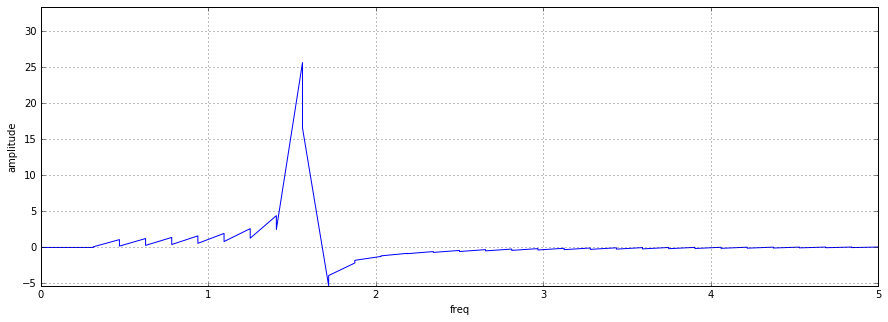

In [8]:
plt.figure(figsize=(15, 5))
plt.xlim(freq[0], freq[-1])
plt.ylim(np.min(y_fft), np.max(y_fft))
plt.xlabel("freq")
plt.ylabel("amplitude")
plt.grid(True)
plt.plot(freq, y_fft_mod)

In [9]:
y_ifft = irfft(y_fft_mod)

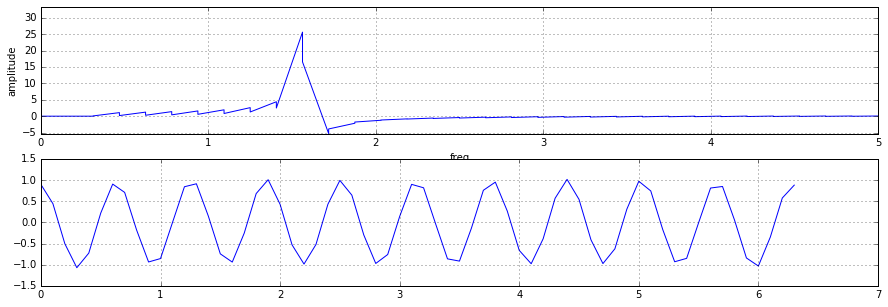

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.xlim(freq[0], freq[-1])
plt.ylim(np.min(y_fft), np.max(y_fft))
plt.xlabel("freq")
plt.ylabel("amplitude")
plt.grid(True)
plt.plot(freq, y_fft_mod)
plt.subplot(2, 1, 2)
plt.grid(True)
plt.plot(x, y_ifft)

In [12]:
with open("iff_data.txt", 'r') as txt:
    data = txt.read()
    data = data.split()
    y_auto = np.array(data[1::2]).astype(np.float32)
    x_auto = np.array(data[0::2]).astype(np.float32)
    print(x_auto.shape, y_auto.shape)

(64,) (64,)


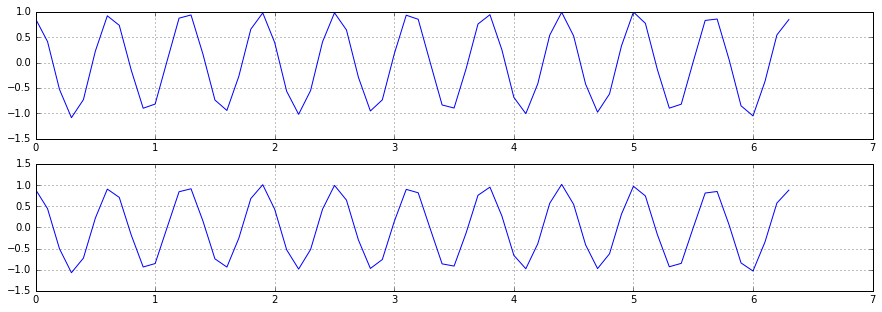

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.grid(True)
plt.plot(x_auto, y_auto)
plt.subplot(2, 1, 2)
plt.grid(True)
plt.plot(x, y_ifft)

In [14]:
print(np.linalg.norm(x - x_auto, ord=np.inf), np.linalg.norm(y - y_auto, ord=np.inf))

1.9073486345888568e-07 1.138535929616812


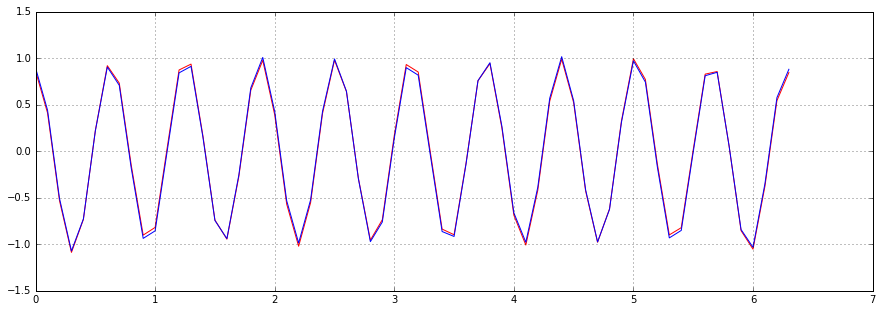

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(x_auto, y_auto, "r")
plt.grid(True)
plt.plot(x, y_ifft)